<a href="https://colab.research.google.com/github/Victor1e/Project_Rumelhart_Romanian/blob/main/varianta_veche.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/60
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.6262 - loss: 1.7225 - val_accuracy: 0.8350 - val_loss: 0.6385
Epoch 2/60
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8457 - loss: 0.5659 - val_accuracy: 0.9284 - val_loss: 0.3111
Epoch 3/60
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9328 - loss: 0.2721 - val_accuracy: 0.9864 - val_loss: 0.1084
Epoch 4/60
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9825 - loss: 0.1050 - val_accuracy: 0.9932 - val_loss: 0.0450
Epoch 5/60
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9923 - loss: 0.0466 - val_accuracy: 0.9978 - val_loss: 0.0227
Epoch 6/60
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9957 - loss: 0.0266 - val_accuracy: 0.9995 - val_loss: 0.0109
Epoch 7/60
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9981 - loss: 0.0158 - val_accuracy: 1.0000 - val_loss: 0.0057
Epoch 8/60
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9990 - loss: 0.0105 - val_accuracy: 1.0000 - v

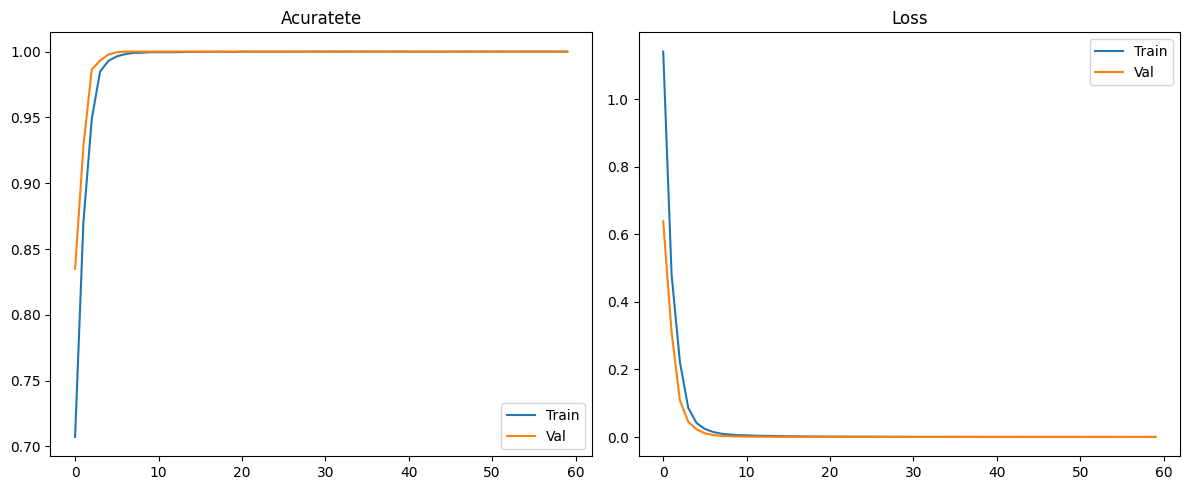


Statistici Test:
Acuratete: 100.00%
Loss: 0.0000

TESTE MODEL VECHI
manca        -> mancat
fi           -> fost
scrie        -> scris
boganiza     -> boganit
programiza   -> pegurat
cauta        -> cautat
vedea        -> vazut


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, Reshape, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import random

def genereaza_verbe_regulate(n=1000):
    consoane = list("bcdfghjklmnprstvz")
    vocale = list("aeiou")
    verbe = []
    for _ in range(n):
        lungime = random.randint(3, 5)
        radacina = ""
        for i in range(lungime):
            if i % 2 == 0: radacina += random.choice(consoane)
            else: radacina += random.choice(vocale)

        if random.random() > 0.3:
            infinitiv = radacina + "a"
            trecut = radacina + "at"
        else:
            infinitiv = radacina + "i"
            trecut = radacina + "it"
        verbe.append((infinitiv, trecut))
    return verbe

verbe_reale = [
    ("fi", "fost"), ("avea", "avut"), ("bea", "baut"), ("da", "dat"),
    ("sta", "stat"), ("lua", "luat"), ("vedea", "vazut"), ("vrea", "vrut"),
    ("stii", "stiut"), ("veni", "venit"), ("scrie", "scris"), ("spune", "spus"),
    ("face", "facut"), ("zice", "zis"), ("duce", "dus"), ("rupe", "rupt"),
    ("coace", "copt"), ("fierbe", "fiert"), ("aduce", "adus"),
    ("manca", "mancat"), ("pleca", "plecat"), ("cauta", "cautat")
]

dataset = genereaza_verbe_regulate(3000) + verbe_reale * 50
random.shuffle(dataset)

all_text = "".join([x[0] + x[1] for x in dataset])
chars = sorted(list(set(all_text)))
char_to_int = {c: i+2 for i, c in enumerate(chars)}
char_to_int['<PAD>'] = 0
char_to_int['<UNK>'] = 1
int_to_char = {i: c for c, i in char_to_int.items()}
vocab_size = len(char_to_int)
max_len = 16

def encode_word(word):
    return [char_to_int.get(c, 1) for c in word]

X = pad_sequences([encode_word(p[0]) for p in dataset], maxlen=max_len, padding='post')
Y = pad_sequences([encode_word(p[1]) for p in dataset], maxlen=max_len, padding='post')
Y_onehot = to_categorical(Y, num_classes=vocab_size)

X_train, X_test, y_train, y_test = train_test_split(X, Y_onehot, test_size=0.1, random_state=42)

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=max_len))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(max_len * vocab_size, activation='softmax'))
model.add(Reshape((max_len, vocab_size)))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=60, batch_size=64, validation_split=0.1, verbose=1)

def analizeaza_performanta(history, model, X_test, y_test):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Val')
    plt.title('Acuratete')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Val')
    plt.title('Loss')
    plt.legend()

    plt.tight_layout()
    plt.savefig('grafic_performanta_retro.png')
    plt.show()

    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"\nStatistici Test:")
    print(f"Acuratete: {acc*100:.2f}%")
    print(f"Loss: {loss:.4f}")

analizeaza_performanta(history, model, X_test, y_test)

def predict_verb(word):
    vec = pad_sequences([encode_word(word)], maxlen=max_len, padding='post')
    pred = model.predict(vec, verbose=0)
    res = ""
    for i in range(max_len):
        idx = np.argmax(pred[0][i])
        if idx > 1:
            res += int_to_char[idx]
    return res

print("\nTESTE MODEL VECHI")
teste = ["manca", "fi", "scrie", "boganiza", "programiza", "cauta", "vedea"]

for t in teste:
    res = predict_verb(t)
    print(f"{t:12} -> {res}")